In [1]:

# references
# - https://github.com/keras-team/keras-contrib/blob/master/examples/improved_wgan.py
# - https://github.com/eriklindernoren/Keras-GAN/blob/master/wgan_gp/wgan_gp.py
# - https://github.com/LynnHo/WGAN-GP-DRAGAN-Celeba-Pytorch/blob/master/models_64x64.py

%pylab inline

from functools import partial

import matplotlib.pyplot as plt

import sys

import numpy as np

import glob, os, shutil
import imageio
import lycon
from skimage import transform
from tqdm import tqdm_notebook as tqdm

Populating the interactive namespace from numpy and matplotlib


In [2]:
# original dims: 218, 178
# crop size 108, 108
crop_size = 128
h_crop = (218-crop_size)//2
w_crop = (178 - crop_size)//2




In [3]:
celeba_base = "/home/ubuntu/downloads/img_align_celeba"

im_files = glob.glob(f"{celeba_base}/*.jpg")

num_images = len(im_files)

In [4]:
shutil.rmtree(f"{celeba_base}/resize128-128", ignore_errors=True)
os.makedirs(f"{celeba_base}/resize128-128", exist_ok=True)


for i in tqdm(range(num_images)):
    
    im_path = im_files[i]
    im_fn = im_path.split("/")[-1]
    im_to_path = f"{celeba_base}/resize128-128/{im_fn}"
    
    imageio.imsave(im_to_path, imageio.imread(im_files[i])[h_crop:-h_crop, w_crop:-w_crop])

In [5]:
print(f"{celeba_base}/resize128-128/*.jpg")
im_files = glob.glob(f"{celeba_base}/resize128-128/*.jpg")

/home/ubuntu/downloads/img_align_celeba/resize128-128/*.jpg


In [6]:
len(im_files)

202599

In [10]:
im_files = glob.glob(f"{celeba_base}/resize128-128/*.jpg")

X_train = np.zeros([100, 128, 128, 3])

for i in tqdm(range(100)):
    
    X_train[i,...] = lycon.load(im_files[i])


In [11]:
X_train = X_train*(2/255) -1

In [12]:
X_train.min(), X_train.max()

(-1.0, 1.0)

In [13]:
def plot_images(x, **kwargs):
    x = (x - x.min())/(x.max()- x.min())
    n_pix = int(np.sqrt(np.prod(x.shape[1:3]))) #assumes images are square
    im_indices = np.random.choice(x.shape[0], 36, replace=False)
    fig, axes = subplots(nrows=6,ncols=6, figsize=(10,10), sharex=True, sharey=True, frameon=False)
    for i,ax in enumerate(axes.flat):
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        curr_i = im_indices[i]
        ax.imshow(x[curr_i].reshape(n_pix,n_pix, 3), aspect="auto", **kwargs)
#         ax.set_title(title)
        ax.axis('off')
    plt.tight_layout(h_pad=0, w_pad=0)

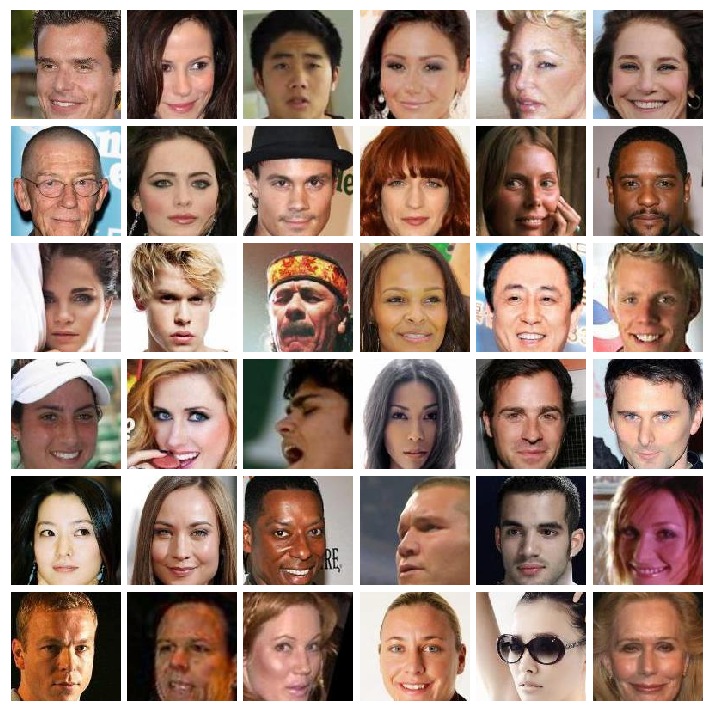

In [14]:
plot_images(X_train)

In [39]:
np.save("celeba.npy", X_train)